In [10]:
# Imports
# ---------
import sys
import pandas as pd
import numpy as np
import feather
import os
import gc
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
import matplotlib.ticker as ticker
from matplotlib.dates import DateFormatter
import matplotlib as mpl

register_matplotlib_converters()

# File locations
# ---------------
data_home201 = '/home/tonyb/Gdrive/MinicondaProjects/oxaria/data/raw/1oxaria/json/gap_filling/'
data_home202 = '/home/tonyb/Gdrive/MinicondaProjects/oxaria/data/raw/2oxaria/json/gap_filling/'
data_homejm1 = '/home/tonyb/Gdrive/MinicondaProjects/oxaria/data/raw/1oxaria/json/gap_filling/q12021/'
data_homejm2 = '/home/tonyb/Gdrive/MinicondaProjects/oxaria/data/raw/2oxaria/json/gap_filling/q12021/'
data_homejs1 = '/home/tonyb/Gdrive/MinicondaProjects/oxaria/data/raw/1oxaria/json/gap_filling/jun_to_sept_2021/'
data_homejs2 = '/home/tonyb/Gdrive/MinicondaProjects/oxaria/data/raw/2oxaria/json/gap_filling/jun_to_sept_2021/'


In [17]:
# Load the df
# -------------
oxaria1_gases1 = pd.read_feather(
    data_home201+'oxaria1_gases_gf.ftr').set_index(['tag', 'rec'])
oxaria2_gases1 = pd.read_feather(
    data_home202+'oxaria2_gases_gf.ftr').set_index(['tag', 'rec'])

oxaria1_gases2 = pd.read_feather(
    data_homejm1+'oxaria1_gases_q12021_gf.ftr').set_index(['tag', 'rec'])
oxaria2_gases2 = pd.read_feather(
    data_homejm2+'oxaria2_gases_q12021_gf.ftr').set_index(['tag', 'rec'])

oxaria1_gases3 = pd.read_feather(
    data_homejs1+'oxaria1_gases_gf_oct.ftr').set_index(['tag', 'rec'])
oxaria2_gases3 = pd.read_feather(
    data_homejs2+'oxaria2_gases_gf_oct.ftr').set_index(['tag', 'rec'])

df1 = pd.concat([oxaria1_gases1,oxaria1_gases2,oxaria1_gases3], axis=0).sort_index()
df2 = pd.concat([oxaria2_gases1,oxaria2_gases2,oxaria2_gases3], axis=0).sort_index()
df1.info(verbose=True)
df2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 41205865 entries, ('scs-bgx-536', Timestamp('2020-01-04 09:45:52+0000', tz='UTC')) to ('scs-bgx-543', Timestamp('2021-09-30 23:59:58+0000', tz='UTC'))
Data columns (total 21 columns):
 #   Column            Dtype  
---  ------            -----  
 0   val.no2.wev       float32
 1   val.no2.cnc       float32
 2   val.no2.aev       float32
 3   val.no2.wec       float32
 4   val.ox.wev        float32
 5   val.ox.cnc        float32
 6   val.ox.aev        float32
 7   val.ox.wec        float32
 8   val.no.wev        float32
 9   val.no.cnc        float32
 10  val.no.aev        float32
 11  val.no.wec        float32
 12  val.co.wev        float32
 13  val.co.cnc        float32
 14  val.co.aev        float32
 15  val.co.wec        float32
 16  val.sht.hmd       float32
 17  val.sht.tmp       float32
 18  insert_date       object 
 19  name              object 
 20  exg.vb20.no2.cnc  float32
dtypes: float32(19), object(2)
memory usage: 4.9+ GB


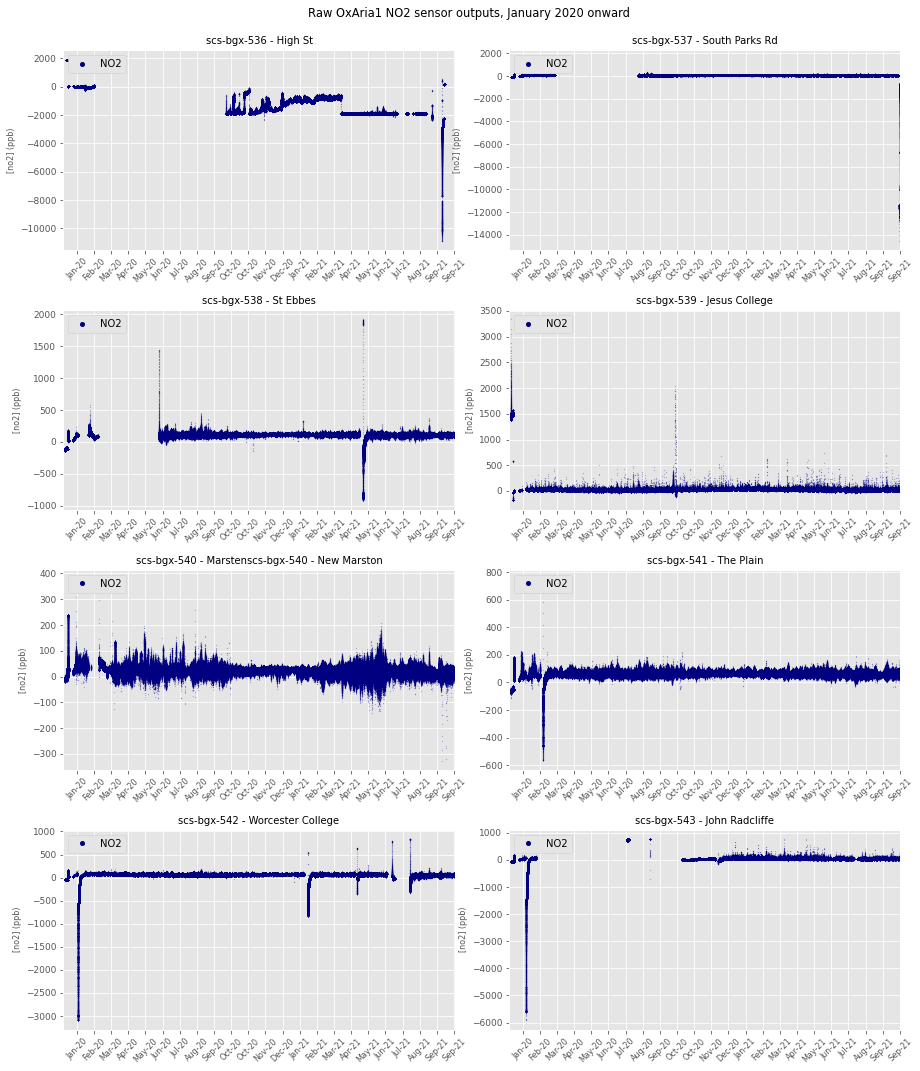

In [26]:
# NO2 oxaria1 sensor ts plot
# ---------------------------
plt.style.use('ggplot')
myFmt = mdates.DateFormatter('%b-%y')
start_date = dt.datetime(2020, 1, 1)
end_date = dt.datetime(2021, 10, 1)

fig, axes = plt.subplots(nrows=4, ncols=2, sharex=False,
                         sharey=False, figsize=(15, 20))
axes_list = [item for sublist in axes for item in sublist]

fig.suptitle('Raw OxAria1 NO2 sensor outputs, January 2020 onward',
             fontsize=11.5, y=0.91)

for tag, dat in df1.groupby('tag'):
    ax = axes_list.pop(0)
    dat.reset_index(level=0, inplace=True)
    t_name = dat['name'].unique()
    dat.plot(y='val.no2.cnc', c='navy', linewidth=0.5, marker='o', ms=0.1, ls='', label='NO2', ax=ax, legend=True,
             zorder=1)
    ax.set_title(''.join(tag+' - '+t_name), fontsize=10)
    ax.tick_params(
        axis='x',
        which='major',
        labelrotation=45,
        labelsize=8
    )
    ax.tick_params(axis='y', labelsize=9)
    ax.tick_params(axis='x', which='minor', length=0)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(28))
    ax.xaxis.set_major_formatter(myFmt)
    plt.setp(ax.xaxis.get_majorticklabels(), ha='center')
    ax.set_xlim(start_date, end_date)
    ax.set_ylabel('[no2] (ppb)', fontsize=8)
    ax.set_xlabel('')
    plt.subplots_adjust(wspace=0.14, hspace=0.3)
    ax.legend(markerscale=40, frameon=True, framealpha=0.99, loc='upper left')

#plt.savefig()
plt.show()

for ax in axes_list:
    ax.remove()

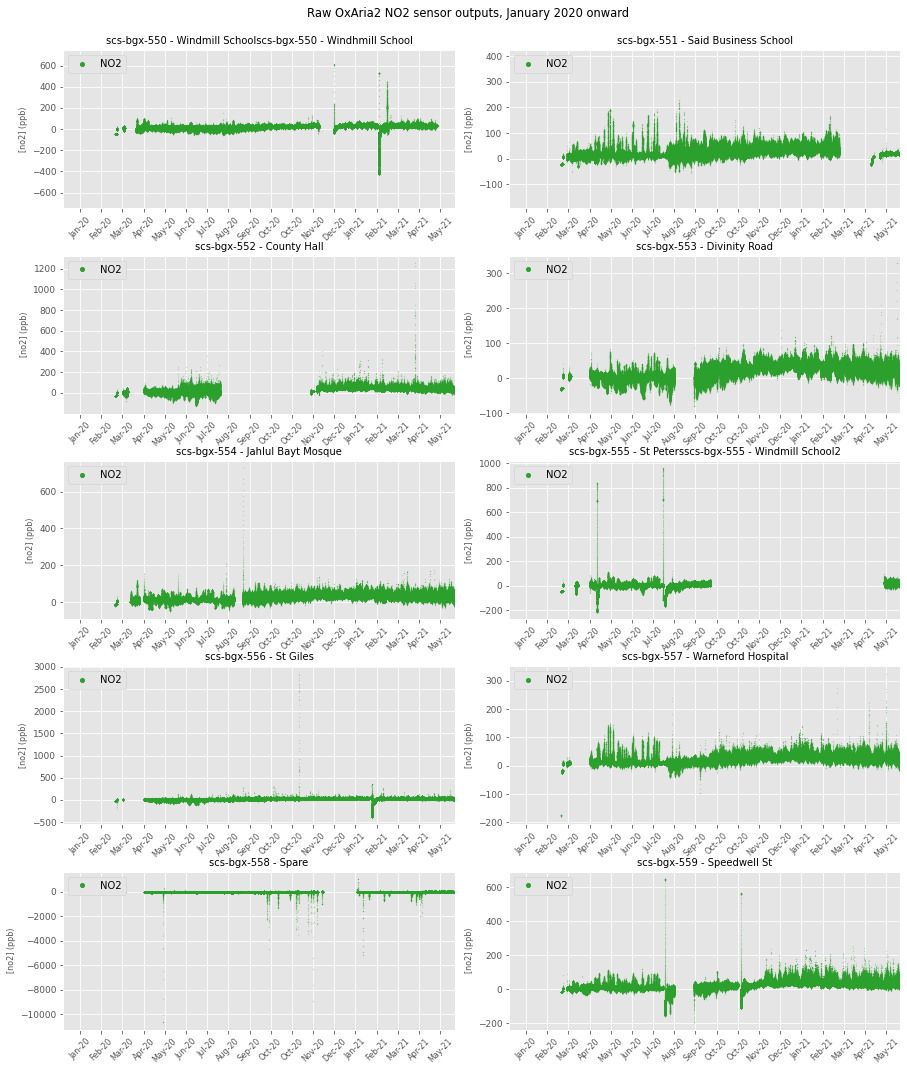

In [27]:
# NO2 oxaria2 sensor ts plot
# ---------------------------
plt.style.use('ggplot')
myFmt = mdates.DateFormatter('%b-%y')
start_date = dt.datetime(2020, 1, 1)
end_date = dt.datetime(2021, 6, 1)

fig, axes = plt.subplots(nrows=5, ncols=2, sharex=False,
                         sharey=False, figsize=(15, 20))
axes_list = [item for sublist in axes for item in sublist]

fig.suptitle('Raw OxAria2 NO2 sensor outputs, January 2020 onward',
             fontsize=11.5, y=0.91)

for tag, dat in df2.groupby('tag'):
    ax = axes_list.pop(0)
    dat.reset_index(level=0, inplace=True)
    t_name = dat['name'].unique()
    dat.plot(y='val.no2.cnc', c='tab:green', linewidth=0.5, marker='o', ms=0.1, ls='', label='NO2', ax=ax, legend=True,
             zorder=1)
    ax.set_title(''.join(tag+' - '+t_name), fontsize=10)
    ax.tick_params(
        axis='x',
        which='major',
        labelrotation=45,
        labelsize=8
    )
    ax.tick_params(axis='y', labelsize=9)
    ax.tick_params(axis='x', which='minor', length=0)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(28))
    ax.xaxis.set_major_formatter(myFmt)
    plt.setp(ax.xaxis.get_majorticklabels(), ha='center')
    ax.set_xlim(start_date, end_date)
    ax.set_ylabel('[no2] (ppb)', fontsize=8)
    ax.set_xlabel('')
    plt.subplots_adjust(wspace=0.14, hspace=0.3)
    ax.legend(markerscale=40, frameon=True, framealpha=0.99, loc='upper left')

#plt.savefig()
plt.show()

for ax in axes_list:
    ax.remove()